In [9]:
import pandas as pd

# Read main dataset
df_main = pd.read_csv('data/Billionaires_Statistics_Dataset_2.csv')

# Read forbes dataset
df_forbes = pd.read_csv('data/forbes_2640_billionaires.csv')

# Read name matching
df_match = pd.read_csv('data/name_matching.csv')

# Filter only exact matches
df_match_exact = df_match[df_match['exact_match'] == True][['dataset1_name', 'dataset2_name']]

# Select columns from forbes
df_forbes_subset = df_forbes[['name', 'Education', 'Bachelor', 'Master', 'Doctorate', 'Drop Out', 'Marital Status', 'Children']].copy()

# Merge matching with forbes data
df_merge = df_match_exact.merge(df_forbes_subset, left_on='dataset2_name', right_on='name', how='left')

# Merge with main dataset
df_result = df_main.merge(
    df_merge[['dataset1_name', 'Education', 'Bachelor', 'Master', 'Doctorate', 'Drop Out','Marital Status', 'Children']], 
    left_on='personName', 
    right_on='dataset1_name', 
    how='left'
)

# Drop the matching column
df_result = df_result.drop('dataset1_name', axis=1)

# Save result
df_result.to_csv('output/merged_billionaires.csv', index=False)

print(f"Merged dataset created with {len(df_result)} rows")
print(f"Columns added: Education, Bachelor, Master, Doctorate, Drop Out")

Merged dataset created with 2644 rows
Columns added: Education, Bachelor, Master, Doctorate, Drop Out


In [10]:
# Read the previously merged dataset
df_merged = pd.read_csv('output/merged_billionaires.csv')

# Read the third billionaires dataset
df3 = pd.read_csv('data/billionaires.csv')

# Read name matching
df_match = pd.read_csv('data/name_matching_dataset3_v2.csv')

# Select columns from dataset 3 and keep only most recent year per person
df3_subset = df3.sort_values('year', ascending=False).drop_duplicates('name', keep='first')
df3_subset = df3_subset[['name', 'wealth.how.category', 'wealth.how.from emerging', 
                          'wealth.how.inherited', 'wealth.how.was founder', 
                          'wealth.how.was political']].copy()

# Merge matching with dataset 3
df_merge = df_match.merge(df3_subset, left_on='dataset3_name', right_on='name', how='left')

# Merge with the previously merged dataset
df_result = df_merged.merge(
    df_merge[['dataset1_name', 'wealth.how.category', 'wealth.how.from emerging', 
              'wealth.how.inherited', 'wealth.how.was founder', 'wealth.how.was political']], 
    left_on='personName', 
    right_on='dataset1_name', 
    how='left'
)

# Drop the matching column
df_result = df_result.drop('dataset1_name', axis=1)

# Save result
df_result.to_csv('output/merged_billionaires_vNew.csv', index=False)

print(f"Merged dataset created with {len(df_result)} rows")
print(f"Columns added: wealth.how.category, wealth.how.from emerging, wealth.how.inherited, wealth.how.was founder, wealth.how.was political")

Merged dataset created with 2644 rows
Columns added: wealth.how.category, wealth.how.from emerging, wealth.how.inherited, wealth.how.was founder, wealth.how.was political


In [11]:
# Read the merged dataset
df = pd.read_csv('output/merged_billionaires_vNew.csv')

print(f'Original rows: {len(df)}')

# Rows to keep for duplicates
rows_to_keep = [1046, 2320, 785, 2114]

# Rows to remove (the duplicates)
rows_to_remove = [1047, 2321, 786, 2115]

# Remove specified duplicate rows
df_cleaned = df.drop(index=rows_to_remove)

print(f'After removing specified duplicates: {len(df_cleaned)}')

# Remove any remaining fully duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

print(f'After removing fully duplicate rows: {len(df_cleaned)}')

# Reset index
df_cleaned = df_cleaned.reset_index(drop=True)

# Save cleaned dataset
df_cleaned.to_csv('output/merged_billionaires_cleaned.csv', index=False)

print(f'\nFinal cleaned dataset: {len(df_cleaned)} rows')
print(f'Duplicate personNames remaining: {df_cleaned["personName"].duplicated().sum()}')

Original rows: 2644
After removing specified duplicates: 2640
After removing fully duplicate rows: 2640

Final cleaned dataset: 2640 rows
Duplicate personNames remaining: 2


In [12]:
df_new = pd.read_csv('output/merged_billionaires_cleaned.csv')

df_new.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,Master,Doctorate,Drop Out,Marital Status,Children,wealth.how.category,wealth.how.from emerging,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,0.0,0.0,0.0,Married,5.0,NaN,NaN,NaN,NaN,NaN
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,0.0,0.0,0.0,Single,10.0,Traded Sectors,False,not inherited,True,False
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,0.0,0.0,0.0,Engaged,4.0,Non-Traded Sectors,False,not inherited,True,False
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,0.0,0.0,1.0,In Relationship,4.0,New Sectors,False,not inherited,True,False
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,1.0,0.0,0.0,"Widowed, Remarried",3.0,Traded Sectors,False,not inherited,True,False


Total billionaires with education data: 1408

Counts by highest degree:
highest_degree
Bachelor     629
Master       507
Unknown      143
Drop Out      77
Doctorate     52
Name: count, dtype: int64

Visualization saved to: output/education_visualization.png


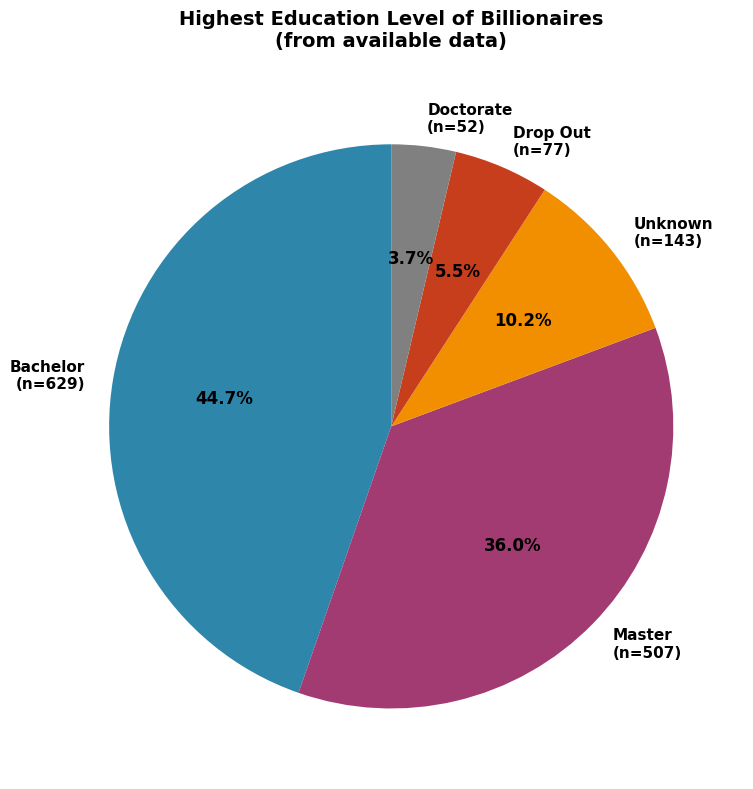

In [13]:
import matplotlib.pyplot as plt

df = pd.read_csv('output/merged_billionaires_cleaned.csv')

# Filter to only rows with education data
df_edu = df[df[['Bachelor', 'Master', 'Doctorate', 'Drop Out']].notna().any(axis=1)].copy()

print(f'Total billionaires with education data: {len(df_edu)}')

# Determine highest degree for each person
def get_highest_degree(row):
    if row['Doctorate'] == 1.0:
        return 'Doctorate'
    elif row['Master'] == 1.0:
        return 'Master'
    elif row['Bachelor'] == 1.0:
        return 'Bachelor'
    elif row['Drop Out'] == 1.0:
        return 'Drop Out'
    else:
        return 'Unknown'

df_edu['highest_degree'] = df_edu.apply(get_highest_degree, axis=1)

# Count by highest degree
degree_counts = df_edu['highest_degree'].value_counts()
print('\nCounts by highest degree:')
print(degree_counts)

# Create visualization
fig, ax = plt.subplots(figsize=(10, 8))
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#808080']

# Create pie chart
wedges, texts, autotexts = ax.pie(degree_counts.values, 
                                    labels=degree_counts.index,
                                    autopct='%1.1f%%',
                                    startangle=90,
                                    colors=colors[:len(degree_counts)],
                                    textprops={'fontsize': 12, 'fontweight': 'bold'})

# Add counts to labels
for i, (label, count) in enumerate(zip(degree_counts.index, degree_counts.values)):
    texts[i].set_text(f'{label}\n(n={count})')
    texts[i].set_fontsize(11)

ax.set_title('Highest Education Level of Billionaires\n(from available data)', 
             fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('output/education_visualization.png', dpi=300, bbox_inches='tight')
print('\nVisualization saved to: output/education_visualization.png')

In [8]:
# Top Universities attended by Billionaires

import pandas as pd
import re

df = pd.read_csv('output/merged_billionaires_cleaned.csv')

# Filter to rows with education data
df_edu = df[df['Education'].notna()].copy()

print(f'Total billionaires with education field data: {len(df_edu)}')

# Extract university names from Education column
def extract_universities(edu_string):
    if pd.isna(edu_string):
        return []
    
    # Split by semicolon or comma to handle multiple degrees
    parts = re.split(r';|,', str(edu_string))
    
    universities = []
    for part in parts:
        # Look for university names (after the degree type)
        # Pattern: "Degree Type, University Name" or just "University Name"
        if 'University' in part or 'College' in part or 'Institute' in part or 'School' in part:
            # Clean up the text
            uni = part.strip()
            # Remove degree prefixes
            uni = re.sub(r'^(Bachelor|Master|Doctor|Doctorate|MBA|PhD|Drop Out|Diploma|Graduate)\s+(of\s+)?(Arts/Science|Business Administration|Science)?,?\s*', '', uni, flags=re.IGNORECASE)
            uni = uni.strip()
            if uni and len(uni) > 3:  # Avoid very short strings
                universities.append(uni)
    
    return universities

# Extract all universities
all_universities = []
for edu in df_edu['Education']:
    unis = extract_universities(edu)
    all_universities.extend(unis)

# Count universities
uni_counts = pd.Series(all_universities).value_counts()

print(f'\nTotal university mentions: {len(all_universities)}')
print(f'Unique universities: {len(uni_counts)}')

print('\n=== TOP 30 UNIVERSITIES FOR BILLIONAIRES ===')
for i, (uni, count) in enumerate(uni_counts.head(30).items(), 1):
    print(f'{i:2d}. {uni:<70} {count:3d} billionaires')

# Save to file
top_universities = pd.DataFrame({
    'Rank': range(1, len(uni_counts) + 1),
    'University': uni_counts.index,
    'Count': uni_counts.values
})

top_universities.to_csv('output/top_universities.csv', index=False)
print('\n\nFull list saved to: output/top_universities.csv')

Total billionaires with education field data: 1407

Total university mentions: 1881
Unique universities: 643

=== TOP 30 UNIVERSITIES FOR BILLIONAIRES ===
 1. Harvard University                                                      75 billionaires
 2. Stanford University                                                     55 billionaires
 3. University of Pennsylvania                                              47 billionaires
 4. High School                                                             45 billionaires
 5. Harvard Business School                                                 40 billionaires
 6. University of California                                                40 billionaires
 7. The Wharton School                                                      27 billionaires
 8. Massachusetts Institute of Technology                                   27 billionaires
 9. University of Mumbai                                                    23 billionaires
10. Yale Universi

In [9]:
df = pd.read_csv('output/merged_billionaires_cleaned.csv')

# Specify the university you want to search for
university_name = "London Business School"  

# Filter billionaires who attended this university
df_uni = df[df['Education'].str.contains(university_name, case=False, na=False)].copy()

print(f'=== BILLIONAIRES FROM {university_name.upper()} ===')
print(f'Total: {len(df_uni)} billionaires\n')

# Display relevant columns
columns_to_show = ['rank', 'personName', 'finalWorth', 'age', 'country', 'source', 'Education']
result = df_uni[columns_to_show].sort_values('finalWorth', ascending=False)

print(result.to_string(index=False))

=== BILLIONAIRES FROM LONDON BUSINESS SCHOOL ===
Total: 3 billionaires

 rank         personName  finalWorth  age   country      source                                                                                                   Education
  124        Kumar Birla       14200 55.0     India Commodities   Master of Business Administration, London Business School; Bachelor of Arts/Science, University of Mumbai
 1434        Thomas Kwok        2100 71.0 Hong Kong Real estate Bachelor of Engineering, Imperial College London; Master of Business Administration, London Business School
 1905 Karl-Johan Persson        1500 48.0    Sweden         H&M                                                            Bachelor of Arts/Science, London Business School
